# gdsfactory in 5 minutes

## Layout

gdsfactory easily enables you to layout a Component, a circuit with many Components, or Component top cell for a reticle.

A `Component` is a canvas where we can add polygons, references to other components or ports.

Lets add two references in a component.

2022-09-10 15:50:05.953 | INFO     | gdsfactory.config:<module>:53 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 5.28.0


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1160: UserWarning: Component 'Unnamed_0d607d1a' contains 1 Unnamed cells
  warnings.warn(


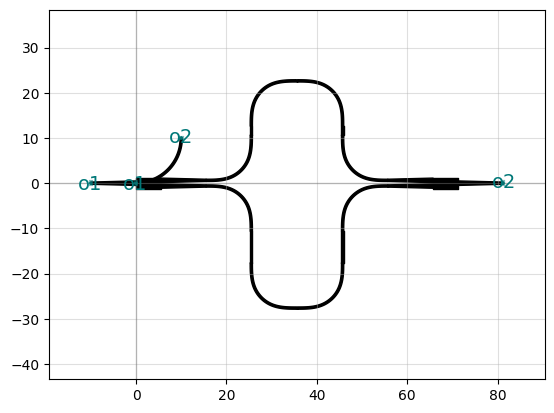

Unnamed_0d607d1a: uid 0, ports [], references ['mzi_1', 'bend_circular_1'], 0 polygons

In [1]:
import gdsfactory as gf

c = gf.Component()
mzi = c << gf.components.mzi()  # equivalent to mzi = c.add_ref(gf.components.mzi())
bend = (
    c << gf.components.bend_circular()
)  # equivalent to bend = c.add_ref(gf.components.bend_circular())
c

You can connect the bend `o1` port to the mzi `o2` port.

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1160: UserWarning: Component 'Unnamed_a3712bcb' contains 1 Unnamed cells
  warnings.warn(


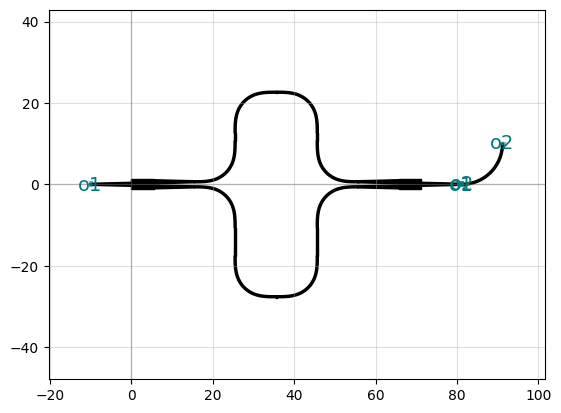

Unnamed_a3712bcb: uid 23, ports [], references ['mzi_1', 'bend_circular_1'], 0 polygons

In [2]:
c = gf.Component()
mzi = c << gf.components.mzi()  # equivalent to mzi = c.add_ref(gf.components.mzi())
bend = (
    c << gf.components.bend_circular()
)  # equivalent to bend = c.add_ref(gf.components.bend_circular())
bend.connect("o1", mzi.ports["o2"])
c

You can also define a `cell` function that returns a parametric Component depending on the arguments you pass and gets automatic name.

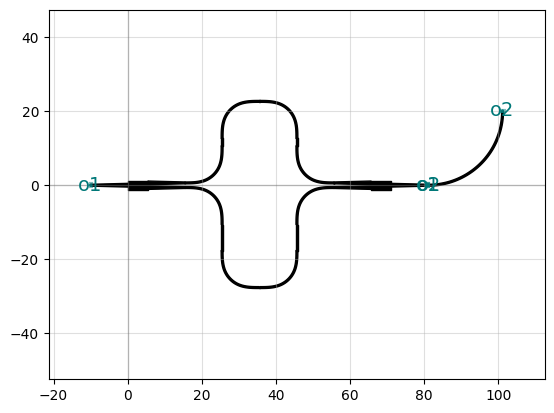

mzi_with_bend_radius20: uid 24, ports [], references ['mzi_1', 'bend_circular_1'], 0 polygons

In [3]:
@gf.cell
def mzi_with_bend(radius: float = 10):
    c = gf.Component()
    mzi = c << gf.components.mzi()  # equivalent to mzi = c.add_ref(gf.components.mzi())
    bend = c << gf.components.bend_circular(
        radius=radius
    )  # equivalent to bend = c.add_ref(gf.components.bend_circular())
    bend.connect("o1", mzi.ports["o2"])
    return c


c = mzi_with_bend(radius=20)
c

Now to connect your component to other components you need to add ports.

In [4]:
c.ports

{}

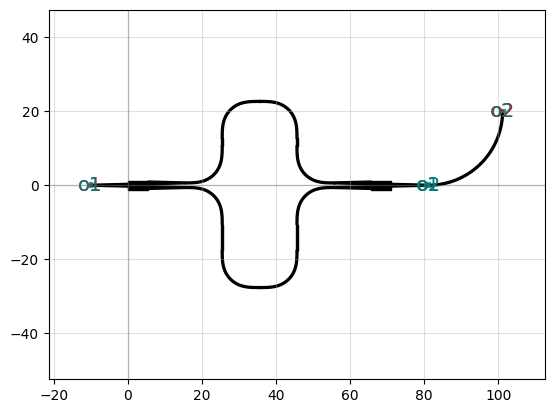

mzi_with_bend_radius20: uid 27, ports ['o1', 'o2'], references ['mzi_1', 'bend_circular_1'], 0 polygons

In [5]:
@gf.cell
def mzi_with_bend(radius: float = 10):
    c = gf.Component()
    mzi = c << gf.components.mzi()  # equivalent to mzi = c.add_ref(gf.components.mzi())
    bend = c << gf.components.bend_circular(
        radius=radius
    )  # equivalent to bend = c.add_ref(gf.components.bend_circular())
    bend.connect("o1", mzi.ports["o2"])
    c.add_port("o1", port=mzi.ports["o1"])
    c.add_port("o2", port=bend.ports["o2"])
    return c


c = mzi_with_bend(
    radius=20, cache=False
)  # as we changed the code inside the function you need to clear the cache from the cell decorator.
c

In [6]:
c.ports

{'o1': Port (name o1, center [-10.   0.], width 0.5, orientation 180, layer (1, 0), port_type optical),
 'o2': Port (name o2, center [101.201  20.   ], width 0.5, orientation 90.0, layer (1, 0), port_type optical)}

Once you have ports you can route it to fiber couplers.

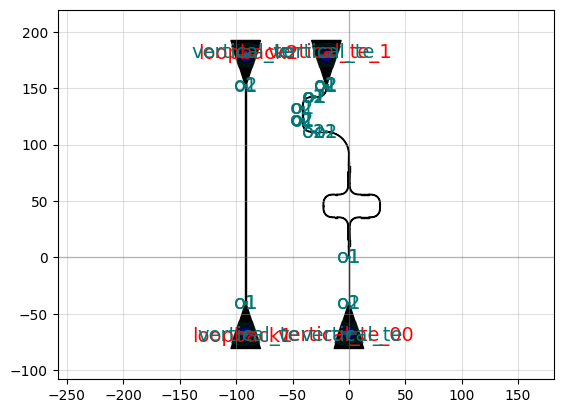

mzi_with_bend_radius20__d5c09015: uid 31, ports ['vertical_te_00', 'vertical_te_1', 'loopback1', 'loopback2'], references ['move_1', 'straight_1', 'bend_euler_1', 'straight_2', 'straight_3', 'bend_euler_2', 'bend_euler_3', 'straight_4', 'straight_5', 'straight_6', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'straight_7', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4'], 0 polygons

In [7]:
c_fiber_single = gf.routing.add_fiber_single(c)
c_fiber_single

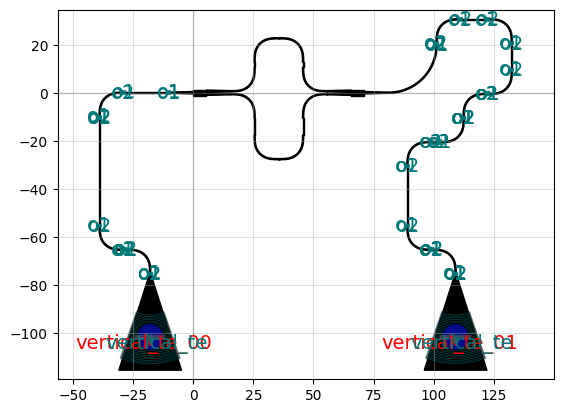

mzi_with_bend_radius20__82f34bf0: uid 50, ports ['vertical_te_00', 'vertical_te_01'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'straight_3', 'straight_4', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_6', 'bend_euler_7', 'straight_8', 'straight_9', 'straight_10', 'bend_euler_8', 'bend_euler_9', 'bend_euler_10', 'bend_euler_11', 'straight_11', 'straight_12', 'straight_13', 'straight_14', 'straight_15', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'mzi_with_bend_1'], 0 polygons

In [8]:
c_fiber_array = gf.routing.add_fiber_array(c, with_loopback=False)
c_fiber_array

In [9]:
scene = c_fiber_array.to_3d()
scene.show()

For a component it's important that you spend some time early to parametrize it correctly. Don't be afraid to spend some time using pen and paper and choosing easy to understand names.

Lets for example define a ring resonator, which is already a circuit made of waveguides, bends and couplers.

Components, circuits and Masks are made in Parametric `cell` functions, that can also accept other ComponentSpec.

A Component Spec can be:

- a parametric cell function (decorated with `cell`)
- a string. To get a cell registered in the active pdk.
- a dict. `dict(component='mmi2x2', length_mmi=3)`

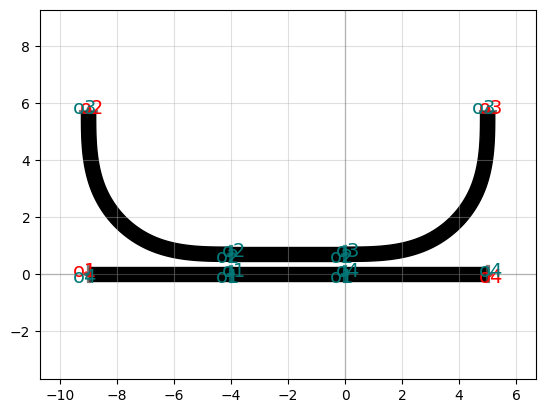

coupler_ring: uid 63, ports ['o2', 'o1', 'o3', 'o4'], references ['coupler90_1', 'coupler90_2', 'coupler_straight_1'], 0 polygons

In [10]:
from typing import Optional

import gdsfactory as gf
from gdsfactory.component import Component
from gdsfactory.components.bend_euler import bend_euler
from gdsfactory.components.coupler90 import coupler90 as coupler90function
from gdsfactory.components.coupler_straight import (
    coupler_straight as coupler_straight_function,
)
from gdsfactory.components.straight import straight as straight_function
from gdsfactory.cross_section import strip
from gdsfactory.snap import assert_on_2nm_grid
from gdsfactory.types import ComponentSpec, CrossSectionSpec


@gf.cell
def coupler_ring(
    gap: float = 0.2,
    radius: float = 5.0,
    length_x: float = 4.0,
    coupler90: ComponentSpec = coupler90function,
    bend: Optional[ComponentSpec] = None,
    straight: ComponentSpec = straight_function,
    coupler_straight: ComponentSpec = coupler_straight_function,
    cross_section: CrossSectionSpec = strip,
    bend_cross_section: Optional[CrossSectionSpec] = None,
    **kwargs
) -> Component:
    r"""Coupler for ring.

    Args:
        gap: spacing between parallel coupled straight waveguides.
        radius: of the bends.
        length_x: length of the parallel coupled straight waveguides.
        coupler90: straight coupled to a 90deg bend.
        bend: bend spec.
        coupler_straight: two parallel coupled straight waveguides.
        cross_section: cross_section spec.
        bend_cross_section: optional bend cross_section spec.
        kwargs: cross_section settings for bend and coupler.

    .. code::

           2             3
           |             |
            \           /
             \         /
           ---=========---
         1    length_x    4


    """
    bend = bend or bend_euler

    c = Component()
    assert_on_2nm_grid(gap)

    # define subcells
    coupler90_component = gf.get_component(
        coupler90,
        gap=gap,
        radius=radius,
        bend=bend,
        cross_section=cross_section,
        bend_cross_section=bend_cross_section,
        **kwargs
    )
    coupler_straight_component = gf.get_component(
        coupler_straight,
        gap=gap,
        length=length_x,
        cross_section=cross_section,
        straight=straight,
        **kwargs
    )

    # add references to subcells
    cbl = c << coupler90_component
    cbr = c << coupler90_component
    cs = c << coupler_straight_component

    # connect references
    y = coupler90_component.y
    cs.connect(port="o4", destination=cbr.ports["o1"])
    cbl.reflect(p1=(0, y), p2=(1, y))
    cbl.connect(port="o2", destination=cs.ports["o2"])

    c.add_port("o1", port=cbl.ports["o3"])
    c.add_port("o2", port=cbl.ports["o4"])
    c.add_port("o3", port=cbr.ports["o3"])
    c.add_port("o4", port=cbr.ports["o4"])
    c.auto_rename_ports()
    return c


coupler = coupler_ring()
coupler

Lets define a ring function that also accepts other component specs for the subcomponents (straight, coupler, bend)

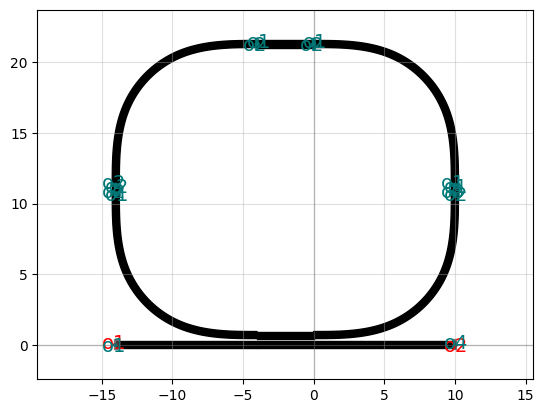

ring_single: uid 72, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [11]:
import gdsfactory as gf


@gf.cell
def ring_single(
    gap: float = 0.2,
    radius: float = 10.0,
    length_x: float = 4.0,
    length_y: float = 0.6,
    coupler_ring: ComponentSpec = coupler_ring,
    straight: ComponentSpec = straight_function,
    bend: ComponentSpec = bend_euler,
    cross_section: ComponentSpec = "strip",
    **kwargs
) -> gf.Component:
    """Returns a single ring.

    ring coupler (cb: bottom) connects to two vertical straights (sl: left, sr: right),
    two bends (bl, br) and horizontal straight (wg: top)

    Args:
        gap: gap between for coupler.
        radius: for the bend and coupler.
        length_x: ring coupler length.
        length_y: vertical straight length.
        coupler_ring: ring coupler spec.
        straight: straight spec.
        bend: 90 degrees bend spec.
        cross_section: cross_section spec.
        kwargs: cross_section settings


    .. code::

          bl-st-br
          |      |
          sl     sr length_y
          |      |
         --==cb==-- gap

          length_x

    """
    gf.snap.assert_on_2nm_grid(gap)

    c = gf.Component()
    cb = c << gf.get_component(
        coupler_ring,
        bend=bend,
        straight=straight,
        gap=gap,
        radius=radius,
        length_x=length_x,
        cross_section=cross_section,
        **kwargs
    )
    sy = gf.get_component(
        straight, length=length_y, cross_section=cross_section, **kwargs
    )
    b = gf.get_component(bend, cross_section=cross_section, radius=radius, **kwargs)
    sx = gf.get_component(
        straight, length=length_x, cross_section=cross_section, **kwargs
    )
    sl = c << sy
    sr = c << sy
    bl = c << b
    br = c << b
    st = c << sx

    sl.connect(port="o1", destination=cb.ports["o2"])
    bl.connect(port="o2", destination=sl.ports["o2"])

    st.connect(port="o2", destination=bl.ports["o1"])
    br.connect(port="o2", destination=st.ports["o1"])
    sr.connect(port="o1", destination=br.ports["o1"])
    sr.connect(port="o2", destination=cb.ports["o3"])

    c.add_port("o2", port=cb.ports["o4"])
    c.add_port("o1", port=cb.ports["o1"])
    return c


ring = ring_single()
ring

How do you customize components?

You can use `functools.partial` to customize the default settings from any component

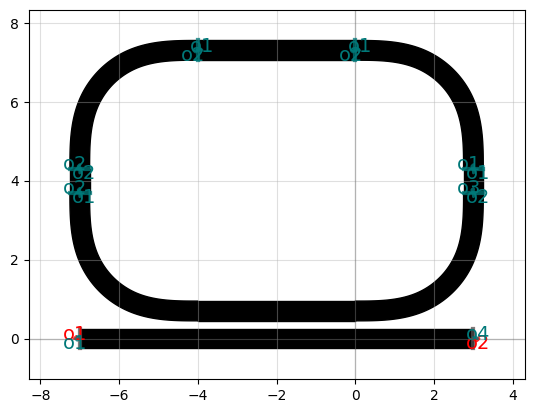

ring_single_radius3: uid 82, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [12]:
ring_single3 = gf.partial(ring_single, radius=3)
ring_single3()

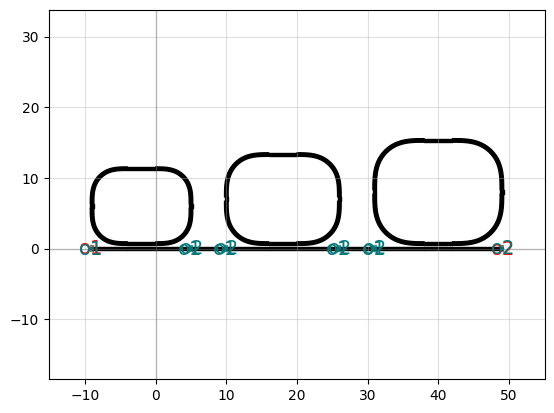

ring_single_array_d7816013: uid 89, ports ['o1', 'o2'], references ['ring_single_1', 'ring_single_2', 'straight_1', 'ring_single_3', 'straight_2'], 0 polygons

In [13]:
ring_array = gf.components.ring_single_array(
    list_of_dicts=[dict(radius=i) for i in [5, 6, 7]]
)
ring_array

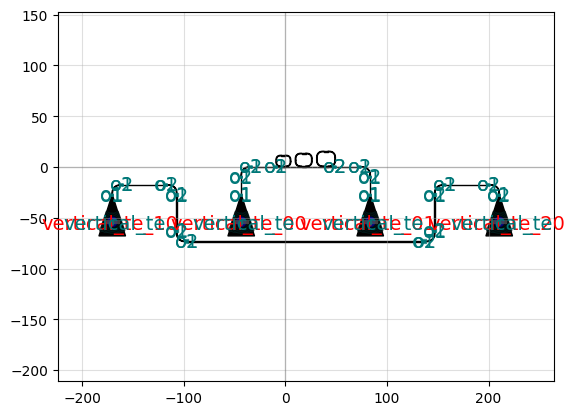

ring_single_array_d7816_f62744ca: uid 108, ports ['vertical_te_00', 'vertical_te_01', 'vertical_te_10', 'vertical_te_20'], references ['bend_euler_1', 'straight_1', 'straight_2', 'bend_euler_2', 'straight_3', 'straight_4', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'bend_euler_7', 'bend_euler_8', 'straight_5', 'straight_6', 'straight_7', 'straight_8', 'straight_9', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2', 'grating_coupler_elliptical_trenches_3', 'grating_coupler_elliptical_trenches_4', 'ring_single_array_1'], 0 polygons

In [14]:
ring_with_grating_couplers = gf.routing.add_fiber_array(ring_array)
ring_with_grating_couplers

## Netlist driven flow

You can define components as a Place and Route netlist.

- instances
- placements
- routes


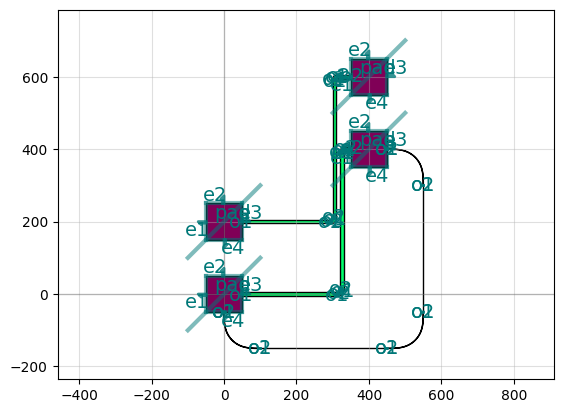

sample_different_factor_0124aeb5: uid 121, ports [], references ['bl', 'tl', 'br', 'tr', 'bend_euler_1', 'bend_euler_2', 'straight_1', 'straight_2', 'straight_3', 'bend_euler_3', 'bend_euler_4', 'straight_4', 'straight_5', 'straight_6', 'bend_euler_5', 'bend_euler_6', 'bend_euler_7', 'straight_7', 'straight_8', 'straight_9', 'straight_10'], 0 polygons

In [15]:
import gdsfactory as gf

yaml = """
name: sample_different_factory

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 0
        y: 200

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600


routes:
    electrical:
        settings:
            separation: 20
            layer: [41, 0]
            width: 10
        links:
            tl,e3: tr,e1
            bl,e3: br,e1
    optical:
        settings:
            radius: 100
        links:
            bl,e4: br,e3

"""

mzi = gf.read.from_yaml(yaml)
mzi

## Hierarchical Component

Once you have your components and circuits defined, you can add them into a reticle for wafer fabrication.

You need to consider:

- what design variations do you want to include in the mask? You need to define your Design Of Experiment or DOE
- obey DRC (Design rule checking) foundry rules for manufacturability. Foundry usually provides those rules for each layer (min width, min space, min density, max density)
- make sure you will be able to test te devices after fabrication. Obey DFT (design for testing) rules. For exammple, if your test setup works only for fiber array, what is the fiber array spacing (127 or 250um?)
- if you plan to package your device, make sure you follow your packaging guidelines from your packaging house (min pad size, min pad pitch, max number of rows for wire bonding ...)

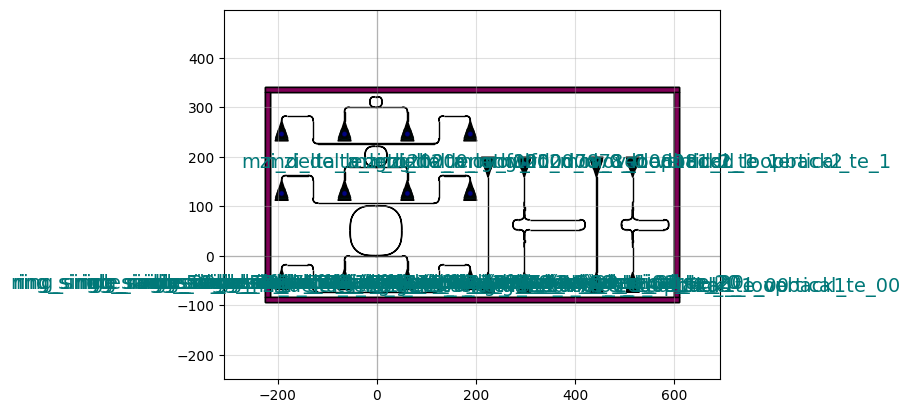

reticle: uid 171, ports [], references ['grid_1', 'pack_doe_1', 'seal_ring_1'], 0 polygons

In [16]:
import toolz
import gdsfactory as gf
from omegaconf import OmegaConf

ring_te = toolz.compose(gf.routing.add_fiber_array, gf.components.ring_single)
rings = gf.grid([ring_te(radius=r) for r in [10, 20, 50]])


@gf.cell
def reticle(size=(1000, 1000)):
    c = gf.Component()
    r = c << rings
    m = c << gf.components.pack_doe(
        gf.components.mzi,
        settings=dict(delta_length=[100, 200]),
        function=gf.routing.add_fiber_single,
    )
    m.xmin = r.xmax + 10
    m.ymin = r.ymin
    c << gf.components.seal_ring(c.bbox)
    return c


m = reticle(cache=False)
m

In [17]:
gdspath = m.write_gds_with_metadata(gdspath="mask.gds")

2022-09-10 15:50:14.994 | INFO     | gdsfactory.component:write_gds:1168 - Write GDS to 'mask.gds'


2022-09-10 15:50:16.077 | INFO     | gdsfactory.component:write_gds_with_metadata:1176 - Write YAML metadata to 'mask.yml'


Make sure you save the GDS with metadata so when the chip comes back you remember what you have on it.

You can also save the labels for automatic testing.

In [18]:
labels_path = gdspath.with_suffix(".csv")
gf.labels.write_labels.write_labels_klayout(gdspath=gdspath, layer_label=(66, 0))

2022-09-10 15:50:16.193 | INFO     | gdsfactory.labels.write_labels:write_labels_klayout:85 - Wrote 12 labels to CSV /home/runner/work/gdsfactory/gdsfactory/docs/notebooks/mask.csv


PosixPath('mask.csv')

In [19]:
mask_metadata = OmegaConf.load(gdspath.with_suffix('.yml'))
tm = gf.labels.merge_test_metadata(mask_metadata=mask_metadata, labels_path=labels_path)

In [20]:
tm.keys()

dict_keys(['ring_single_radius10', 'ring_single_radius20', 'ring_single_radius50'])

You want to learn more tutorials?

- Routing: for complex routing.
- Plugins: for simulation interfaces.
    - Mode solvers.
    - FDTD. For simulating Sparameters of each component.
    - Circuit simulators.